<a href="https://colab.research.google.com/github/januusingh/intro-to-data-science/blob/main/Golden_State_Warriors_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import Data

Stored in a nested Google Drive folder called `/GSW Data Analysis/NBA Data` which is stored in your drive (`My Drive`).

In [3]:
# Set up colab to read from Google Drive, rather than the local files on your computer.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Define the directory where your data is stored.
data_dir = "/content/drive/My Drive/GSW Data Analysis/NBA Data/"

## Read in  CSV files using [`pandas.read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

NOTE: Can read other file types as well, including Excel, Google sheets, JSON, XML, etc. See Pandas [user guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) for more info.


In [5]:
games_df = pd.read_csv(data_dir + "games.csv")
teams_df = pd.read_csv(data_dir + "teams.csv")

## Explore the datasets you imported

Some helper functions: 
1. [`pandas.Dataframe.head()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)
2. [`pandas.Dataframe.describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
3. [`pandas.Dataframe.columns`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html)
4. [`pandas.Dataframe.shape`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html)

In [6]:
games_df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,0.760,...,23.0,53.0,1610612750,113.0,0.422,0.875,0.357,21.0,46.0,0
1,2022-03-12,22101006,Final,1610612741,1610612739,2021,1610612741,101.0,0.443,0.933,...,20.0,46.0,1610612739,91.0,0.419,0.824,0.208,19.0,40.0,1
2,2022-03-12,22101007,Final,1610612759,1610612754,2021,1610612759,108.0,0.412,0.813,...,28.0,52.0,1610612754,119.0,0.489,1.000,0.389,23.0,47.0,0
3,2022-03-12,22101008,Final,1610612744,1610612749,2021,1610612744,122.0,0.484,0.933,...,33.0,55.0,1610612749,109.0,0.413,0.696,0.386,27.0,39.0,1
4,2022-03-12,22101009,Final,1610612743,1610612761,2021,1610612743,115.0,0.551,0.750,...,32.0,39.0,1610612761,127.0,0.471,0.760,0.387,28.0,50.0,0


In [25]:
# Calculate the # of rows and columns in this dataset
games_df.shape

(25796, 24)

In [7]:
games_df.describe()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,2.579600e+04,2.579600e+04,2.579600e+04,25796.000000,2.579600e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,2.579600e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25796.000000
mean,2.169208e+07,1.610613e+09,1.610613e+09,2011.798341,1.610613e+09,103.106044,0.460313,0.759705,0.355896,22.736779,43.345799,1.610613e+09,100.294120,0.449265,0.758082,0.349413,21.403899,42.085146,0.587494
std,5.496041e+06,8.638857e+00,8.654846e+00,5.397985,8.638857e+00,13.174726,0.056629,0.100692,0.111940,5.177566,6.621832,8.654846e+00,13.343016,0.055528,0.103418,0.110194,5.140897,6.526951,0.492295
min,1.030000e+07,1.610613e+09,1.610613e+09,2003.000000,1.610613e+09,36.000000,0.250000,0.143000,0.000000,6.000000,15.000000,1.610613e+09,33.000000,0.244000,0.143000,0.000000,4.000000,19.000000,0.000000
25%,2.060109e+07,1.610613e+09,1.610613e+09,2007.000000,1.610613e+09,94.000000,0.421000,0.696000,0.286000,19.000000,39.000000,1.610613e+09,91.000000,0.412000,0.692000,0.278000,18.000000,38.000000,0.000000
50%,2.120040e+07,1.610613e+09,1.610613e+09,2012.000000,1.610613e+09,103.000000,0.459000,0.765000,0.355000,23.000000,43.000000,1.610613e+09,100.000000,0.448000,0.765000,0.350000,21.000000,42.000000,1.000000
75%,2.170070e+07,1.610613e+09,1.610613e+09,2016.000000,1.610613e+09,112.000000,0.500000,0.829000,0.429000,26.000000,48.000000,1.610613e+09,109.000000,0.487000,0.833000,0.420000,25.000000,46.000000,1.000000
max,5.200021e+07,1.610613e+09,1.610613e+09,2021.000000,1.610613e+09,168.000000,0.684000,1.000000,1.000000,50.000000,72.000000,1.610613e+09,168.000000,0.687000,1.000000,1.000000,46.000000,81.000000,1.000000


In [8]:
# All the columns in the dataframe
games_df.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

In [9]:
teams_df.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


## Checkpoint: What do you notice about the raw data?

1. Does your data look like how you expected?
2. What columns do you see?
3. Do you notice any missing data?

## Recap to our initial question: How many games do the warriors win each season? Do they win more home games per season?

1. Do we have all the data necessary to answer this question?
2. Are there any new questions that we can answer given this dataset?

# Data Cleaning

We will need to perform a few steps of data cleaning on the games dataframe in order to answer the questions that we are interested in.

## Let's understand the teams dataset

1. How can we see all the teams that are included in this dataset? `df['column_name']`
2. Which column has the team names?
3. Which column has the team ID?

In [10]:
# Let's see all the team IDs.
teams_df['TEAM_ID']

0     1610612737
1     1610612738
2     1610612740
3     1610612741
4     1610612742
5     1610612743
6     1610612745
7     1610612746
8     1610612747
9     1610612748
10    1610612749
11    1610612750
12    1610612751
13    1610612752
14    1610612753
15    1610612754
16    1610612755
17    1610612756
18    1610612757
19    1610612758
20    1610612759
21    1610612760
22    1610612761
23    1610612762
24    1610612763
25    1610612764
26    1610612765
27    1610612766
28    1610612739
29    1610612744
Name: TEAM_ID, dtype: int64

## Let's add a new columns to `games_df` for the following:

1. Home team name
2. Visitor team name
3. Winning team name

### Create a [dictionary](https://www.geeksforgeeks.org/python-dictionary/) that maps the team ID to the team name abbreviation.

In [11]:
# Extract the team names by creating a dictonary that maps team IDs to the team name abbreviation.
team_id_abbrev = dict(zip(teams_df['TEAM_ID'], teams_df['ABBREVIATION']))
team_id_abbrev

{1610612737: 'ATL',
 1610612738: 'BOS',
 1610612740: 'NOP',
 1610612741: 'CHI',
 1610612742: 'DAL',
 1610612743: 'DEN',
 1610612745: 'HOU',
 1610612746: 'LAC',
 1610612747: 'LAL',
 1610612748: 'MIA',
 1610612749: 'MIL',
 1610612750: 'MIN',
 1610612751: 'BKN',
 1610612752: 'NYK',
 1610612753: 'ORL',
 1610612754: 'IND',
 1610612755: 'PHI',
 1610612756: 'PHX',
 1610612757: 'POR',
 1610612758: 'SAC',
 1610612759: 'SAS',
 1610612760: 'OKC',
 1610612761: 'TOR',
 1610612762: 'UTA',
 1610612763: 'MEM',
 1610612764: 'WAS',
 1610612765: 'DET',
 1610612766: 'CHA',
 1610612739: 'CLE',
 1610612744: 'GSW'}

### Create new columns for the home and visitor team names

We can add new columns using the syntax `df['new_column_name'] = column_value`.

NOTE: `column_value` can be a string that is the same for each row or a list that sets a unique value for each row. Because each team name can be different for each row in this analysis, we are going to create new lists which contain the value of the team name and set that as the column value.

We can use the function [`pandas.Series.map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html) to map each team ID to its abbreviation (defined in `team_id_abbrev`).

In [12]:
games_df['HOME_TEAM_NAME'] = games_df['HOME_TEAM_ID'].map(team_id_abbrev)
games_df['VISITOR_TEAM_NAME'] = games_df['VISITOR_TEAM_ID'].map(team_id_abbrev)

### Create a new columns for the name of the winning team

We can use the [`numpy.where`](https://numpy.org/doc/stable/reference/generated/numpy.where.html) function to create a conditional `IF` statement. If `HOME_TEAM_WINS` = 1, then we set the winning team name as `HOME_TEAM_NAME`, else, `VISTOR_TEAM_NAME`.

In [13]:
games_df['WINNING_TEAM_NAME'] = np.where(games_df['HOME_TEAM_WINS'], # Condition
                                         games_df['HOME_TEAM_NAME'], # If true
                                         games_df['VISITOR_TEAM_NAME'] # Else
                                         )

### Verify that your new columns were added to the correct dataset with the expected values

In [14]:
games_df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,HOME_TEAM_NAME,VISITOR_TEAM_NAME,WINNING_TEAM_NAME
0,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,0.760,...,113.0,0.422,0.875,0.357,21.0,46.0,0,MIA,MIN,MIN
1,2022-03-12,22101006,Final,1610612741,1610612739,2021,1610612741,101.0,0.443,0.933,...,91.0,0.419,0.824,0.208,19.0,40.0,1,CHI,CLE,CHI
2,2022-03-12,22101007,Final,1610612759,1610612754,2021,1610612759,108.0,0.412,0.813,...,119.0,0.489,1.000,0.389,23.0,47.0,0,SAS,IND,IND
3,2022-03-12,22101008,Final,1610612744,1610612749,2021,1610612744,122.0,0.484,0.933,...,109.0,0.413,0.696,0.386,27.0,39.0,1,GSW,MIL,GSW
4,2022-03-12,22101009,Final,1610612743,1610612761,2021,1610612743,115.0,0.551,0.750,...,127.0,0.471,0.760,0.387,28.0,50.0,0,DEN,TOR,TOR


### Let's extract games only where the Warriors are playing

We can filter the dataframe using the following syntax `df[condition]`, where if condition is true, the row will show. 

The condition can be anything like `games_df["HOME_TEAM_WINS"] == 1` or `teams_df["SEASON"] == 2019`.

1. How do we know if either of the teams playing (could be home or visiting teams) are the Warriors?
2. What columns can we use?

In [15]:
gsw_team_name = "GSW"

In [16]:
warriors_games_df = games_df[
    (games_df['HOME_TEAM_NAME'] == gsw_team_name) # Extract all rows where the Warriors are the home team
    | (games_df['VISITOR_TEAM_NAME'] == gsw_team_name) # Extract all rows where the Warriors are the visiting team
    ]
warriors_games_df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,HOME_TEAM_NAME,VISITOR_TEAM_NAME,WINNING_TEAM_NAME
3,2022-03-12,22101008,Final,1610612744,1610612749,2021,1610612744,122.0,0.484,0.933,...,109.0,0.413,0.696,0.386,27.0,39.0,1,GSW,MIL,GSW
18,2022-03-10,22100994,Final,1610612743,1610612744,2021,1610612743,102.0,0.417,0.781,...,113.0,0.477,0.750,0.333,26.0,36.0,0,DEN,GSW,GSW
36,2022-03-08,22100980,Final,1610612744,1610612746,2021,1610612744,112.0,0.478,0.846,...,97.0,0.355,0.826,0.308,23.0,47.0,1,GSW,LAC,GSW
43,2022-03-07,22100528,Final,1610612743,1610612744,2021,1610612743,131.0,0.548,0.707,...,124.0,0.511,0.739,0.425,29.0,41.0,1,DEN,GSW,DEN
58,2022-03-05,22100959,Final,1610612747,1610612744,2021,1610612747,124.0,0.494,0.857,...,116.0,0.500,0.474,0.441,22.0,41.0,1,LAL,GSW,LAL


# Calculate the number of wins for the Warriors

## Calculate the total number of games won by the Warriors

Can we tell much from this data? There are over 15 seasons in this dataset.

In [42]:
games_warriors_win_df = warriors_games_df[warriors_games_df['WINNING_TEAM_NAME'] == gsw_team_name]
games_warriors_win_df.shape

(983, 24)

## Calculate the total number of games won by the Warriors *per season*

We can use a helper function called [`pandas.Dataframe.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) which combines data from multiple rows into a single row.

Example: 
`games_warriors_win_df.groupby("HOME_TEAM_NAME")` will create 1 row for each team that the warriors have played.

In [26]:
gsw_wins_per_season = games_warriors_win_df.groupby('SEASON').size()
gsw_wins_per_season

SEASON
2003    41
2004    36
2005    36
2006    52
2007    51
2008    32
2009    30
2010    39
2011    24
2012    58
2013    57
2014    89
2015    91
2016    89
2017    76
2018    72
2019    17
2020    42
2021    51
dtype: int64

### Let's visualize this data!

We can use a function called [`pandas.Dataframe.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) which will graph data for us if it's in the appropriate format.

NOTE: We can use other dedicated packages (i.e. [Matplotlib](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) or [Seaborn](https://seaborn.pydata.org/)) for more aesthetic and complicated plots. Pandas uses Matplotlib under the hood for its in-built functions.

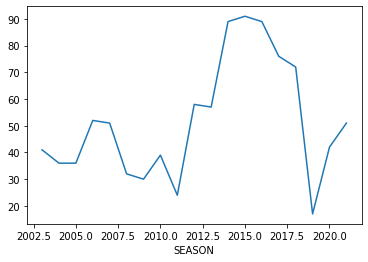

In [ ]:
gsw_wins_per_season.plot()

### Reformat the data 

If we want to make the graph more descriptive + prettier, we can specify parameters in the [`pandas.Dataframe.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) function. 

Some examples:
1. X & Y labels
2. Graph titles
3. Figure size
4. Axis ticks

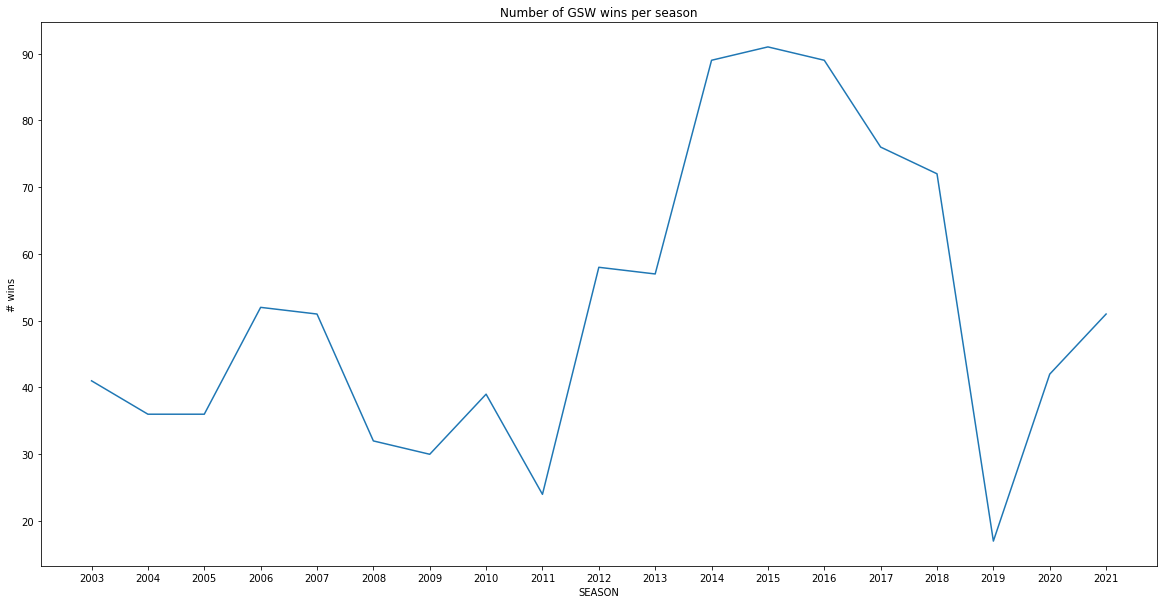

In [ ]:
gsw_wins_per_season.plot(ylabel="# wins", 
                         figsize=(20,10), 
                         title="Number of GSW wins per season", 
                         xticks=gsw_wins_per_season.index)

## Compare the number of wins for the Warriors at home vs. away for each season

Discuss: How can we break down this further by home vs. away court advantage? (Think about what your data looks like)

HINT: There's multiple ways to do this.

### Option 1: Filter and create 2 dataframes from `games_warriors_win_df`

1. Create 2 dataframes, one when the Warriors win at home and another when they win away.
2. Group the dataframes and plot them similar to the previous example.
3. Let's add a label to distinguish when they win using the `label` parameter in the plot function.

In [56]:
# Filter the dataframes for when they win
games_warriors_win_at_home = games_warriors_win_df[games_warriors_win_df['HOME_TEAM_NAME'] == "GSW"]
games_warriors_win_away = games_warriors_win_df[games_warriors_win_df['VISITOR_TEAM_NAME'] == "GSW"]

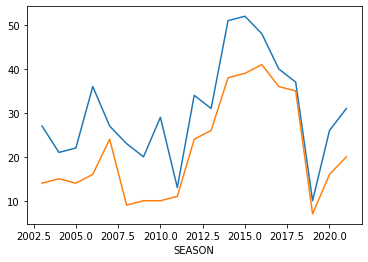

In [75]:
gsw_wins_at_home_per_season = games_warriors_win_at_home.groupby("SEASON").size()
gsw_wins_at_home_per_season.plot(label="home")
gsw_wins_at_away_per_season = games_warriors_win_away.groupby("SEASON").size()
gsw_wins_at_away_per_season.plot(label="away");

### Let's reformat the graphs!

1. Create a bigger plot using the `plt.figure()` function from Matplotlib. 
2. Add a label using the `label` parameter in the plot function.
3. Specify that we want to show the legend in the plot using `plt.legend()`.
4. Reformat other aspects of the plot (i.e. Title, axis labels, axis ticks, etc.)

In [73]:
games_warriors_win_at_home

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,HOME_TEAM_NAME,VISITOR_TEAM_NAME,WINNING_TEAM_NAME,WIN_AT_HOME
3,2022-03-12,22101008,Final,1610612744,1610612749,2021,1610612744,122.0,0.484,0.933,...,0.413,0.696,0.386,27.0,39.0,1,GSW,MIL,GSW,True
36,2022-03-08,22100980,Final,1610612744,1610612746,2021,1610612744,112.0,0.478,0.846,...,0.355,0.826,0.308,23.0,47.0,1,GSW,LAC,GSW,True
170,2022-02-12,22100854,Final,1610612744,1610612747,2021,1610612744,117.0,0.444,0.735,...,0.466,0.667,0.407,25.0,48.0,1,GSW,LAL,GSW,True
234,2022-02-03,22100785,Final,1610612744,1610612758,2021,1610612744,126.0,0.560,0.750,...,0.525,0.826,0.355,29.0,25.0,1,GSW,SAC,GSW,True
273,2022-01-29,22100750,Final,1610612744,1610612751,2021,1610612744,110.0,0.408,0.889,...,0.398,0.810,0.393,21.0,52.0,1,GSW,BKN,GSW,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25632,2014-11-05,21400068,Final,1610612744,1610612746,2014,1610612744,121.0,0.581,1.000,...,0.463,0.778,0.368,26.0,30.0,1,GSW,LAC,GSW,True
25662,2014-11-01,21400038,Final,1610612744,1610612747,2014,1610612744,127.0,0.554,0.857,...,0.466,0.720,0.286,21.0,37.0,1,GSW,LAL,GSW,True
25696,2014-10-24,11400117,Final,1610612744,1610612743,2014,1610612744,119.0,0.512,0.655,...,0.500,0.793,0.313,21.0,46.0,1,GSW,DEN,GSW,True
25714,2014-10-21,11400096,Final,1610612744,1610612746,2014,1610612744,125.0,0.590,0.800,...,0.386,0.805,0.357,26.0,31.0,1,GSW,LAC,GSW,True


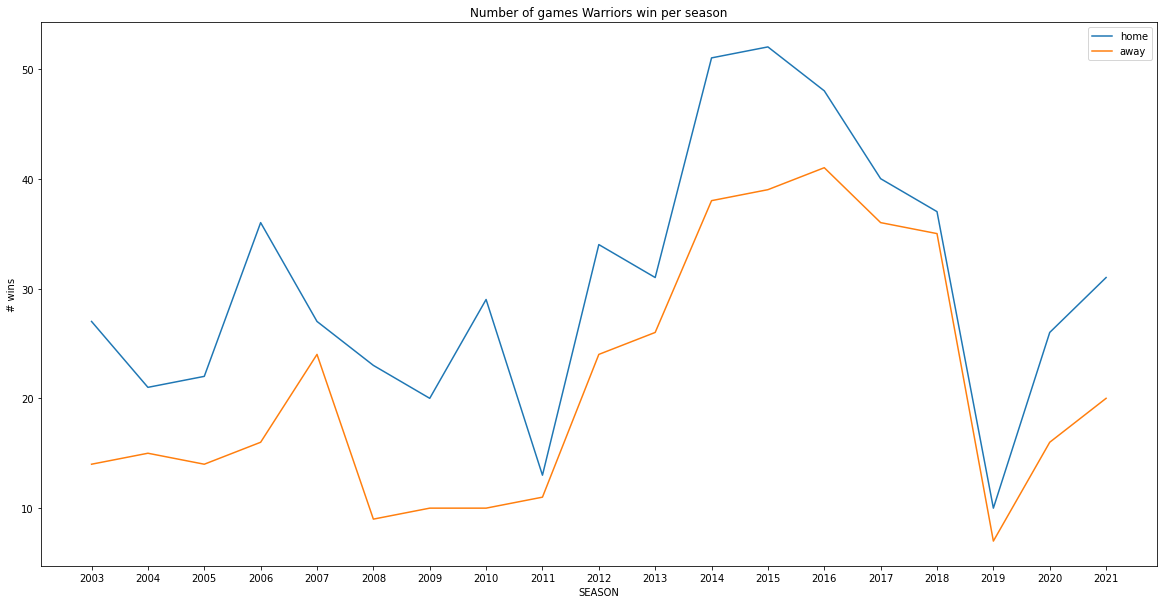

In [76]:
plt.figure(figsize=(20,10))

gsw_wins_at_home_per_season.plot(label="home")
gsw_wins_at_away_per_season.plot(label="away")

plt.legend()
plt.xticks(gsw_wins_at_away_per_season.index)
plt.title("Number of games Warriors win per season")
plt.ylabel("# wins");

# Let's compare Warriors performance to another team

Lakers team name abbreviation is `LAL`

In [79]:
# Extract the number of games played by the Lakers.
lakers_games_df = games_df[
    (games_df['HOME_TEAM_NAME'] == "LAL") | 
    (games_df['VISITOR_TEAM_NAME'] == "LAL")]
lakers_games_df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,HOME_TEAM_NAME,VISITOR_TEAM_NAME,WINNING_TEAM_NAME
16,2022-03-11,22101004,Final,1610612747,1610612764,2021,1610612747,122.0,0.527,0.706,...,109.0,0.459,0.667,0.333,21.0,47.0,1,LAL,WAS,LAL
23,2022-03-09,22100985,Final,1610612745,1610612747,2021,1610612745,139.0,0.510,0.947,...,130.0,0.465,0.692,0.383,25.0,48.0,1,HOU,LAL,HOU
42,2022-03-07,22100973,Final,1610612759,1610612747,2021,1610612759,117.0,0.548,0.533,...,110.0,0.473,0.696,0.308,19.0,43.0,1,SAS,LAL,SAS
58,2022-03-05,22100959,Final,1610612747,1610612744,2021,1610612747,124.0,0.494,0.857,...,116.0,0.500,0.474,0.441,22.0,41.0,1,LAL,GSW,LAL
74,2022-03-03,22100945,Final,1610612746,1610612747,2021,1610612746,132.0,0.548,0.867,...,111.0,0.488,0.773,0.343,26.0,36.0,1,LAC,LAL,LAC


In [85]:
# Extract the number of games won by the Lakers
games_won_by_lal = lakers_games_df[lakers_games_df['WINNING_TEAM_NAME'] == "LAL"]

# Find the number of games won by the Lakers per season
lal_wins_per_season = games_won_by_lal.groupby("SEASON").size()

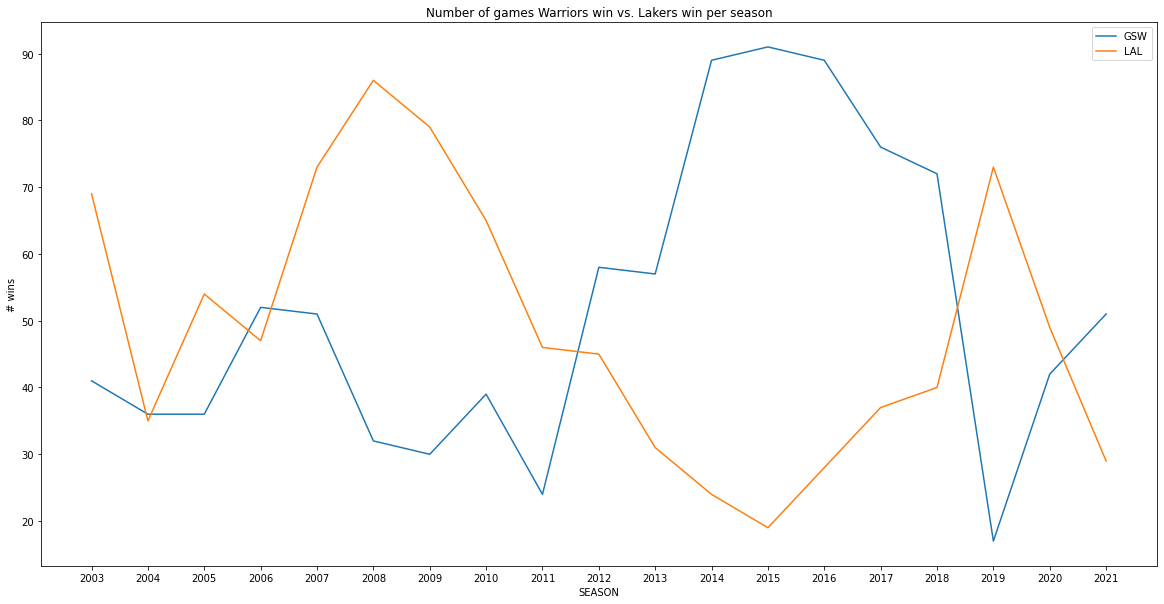

In [86]:
plt.figure(figsize=(20,10))

gsw_wins_per_season.plot(label="GSW")
lal_wins_per_season.plot(label="LAL")

plt.legend()
plt.xticks(gsw_wins_at_away_per_season.index)
plt.title("Number of games Warriors win vs. Lakers win per season")
plt.ylabel("# wins");

# Are there any other questions that you want to explore?